In [1]:
import pandas as pd
from pathlib import Path
from PIL import Image

from torchvision import transforms
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from iris.data import LandMarkDataset, labels

batch_size = 8

In [3]:
anotations = pd.read_csv(str(Path.cwd().parent / "img_metadata_train_dev.csv"))
land_mark_dataset_medellin = LandMarkDataset(str(Path.cwd().parent / "dataset/train"), anotations)
train_dataloader = DataLoader(land_mark_dataset_medellin, batch_size=batch_size, shuffle=True)


Number of images and shape torch.Size([8, 3, 400, 600]) with its labels 20


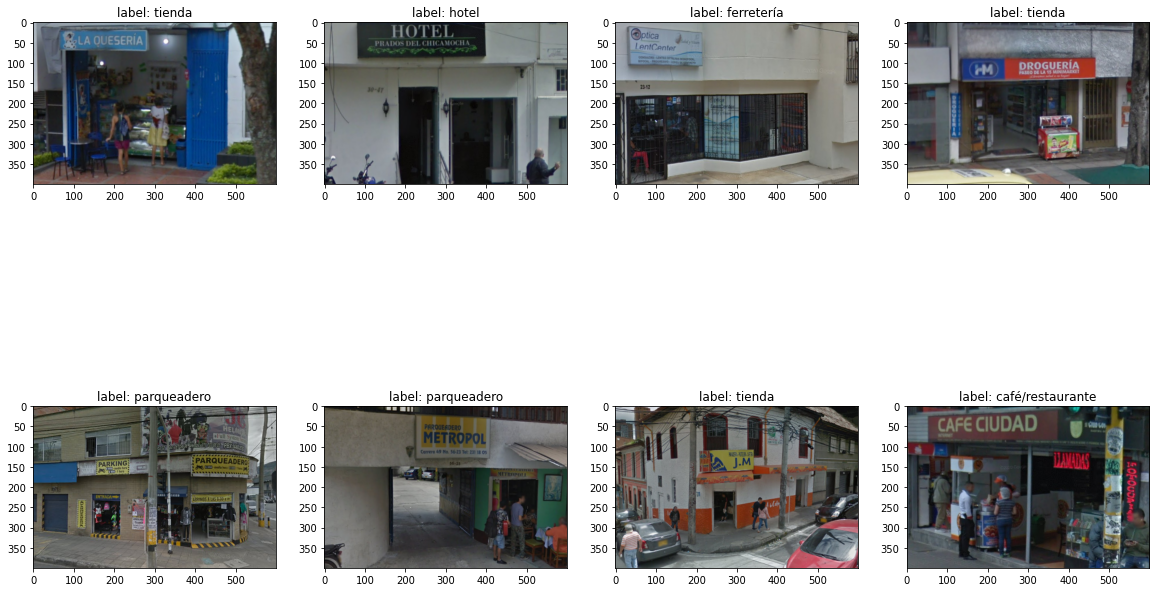

In [4]:

features, pred_labels = next(iter(train_dataloader))
print(f"Number of images and shape {features.shape} with its labels {len(labels)}")

plt.figure(figsize=(20, 20))
columns = 4
rows = int(len(features) / columns + 1)
for i, image in enumerate(features):
    image = transforms.ToPILImage()(image).convert("RGB")
    plt.subplot(rows, columns, i + 1)
    plt.imshow(image)
    plt.title(f"label: {labels[pred_labels[i]]}")

In [5]:
from torch.utils.data.sampler import WeightedRandomSampler
import numpy as np

w = anotations.iloc[:, 4].to_numpy()
sampler = WeightedRandomSampler(w, batch_size)

land_mark_dataset_medellin_s = LandMarkDataset(str(Path.cwd().parent / "dataset/train"), anotations)
train_dataloader_s = DataLoader(land_mark_dataset_medellin_s, batch_size=batch_size, sampler=sampler)

for label, w in zip(labels, w):
    print(f"labels {label} and weights {w}")

labels tienda and weights 0.0155519387851757
labels parqueadero and weights 0.0155519387851757
labels belleza/barbería/peluquería and weights 0.0044246361050781
labels electrónica/cómputo and weights 0.0096959618352021
labels café/restaurante and weights 0.0044246361050781
labels electrodomésticos and weights 0.0288210241706926
labels talleres carros/motos and weights 0.0100047504286799
labels zapatería and weights 0.0096959618352021
labels muebles/tapicería and weights 0.0592734270680282
labels ferretería and weights 0.0096959618352021
labels carnicería/fruver and weights 0.0288210241706926
labels puesto móvil/toldito and weights 0.0044246361050781
labels farmacia and weights 0.0044246361050781
labels supermercado and weights 0.0383108735927499
labels ropa and weights 0.0096959618352021
labels deporte and weights 0.0044246361050781
labels licorera and weights 0.0044246361050781
labels hotel and weights 0.0100047504286799
labels animales and weights 0.0628298326921099
labels bar and we

Number of images and shape torch.Size([8, 3, 400, 600]) with its labels 20


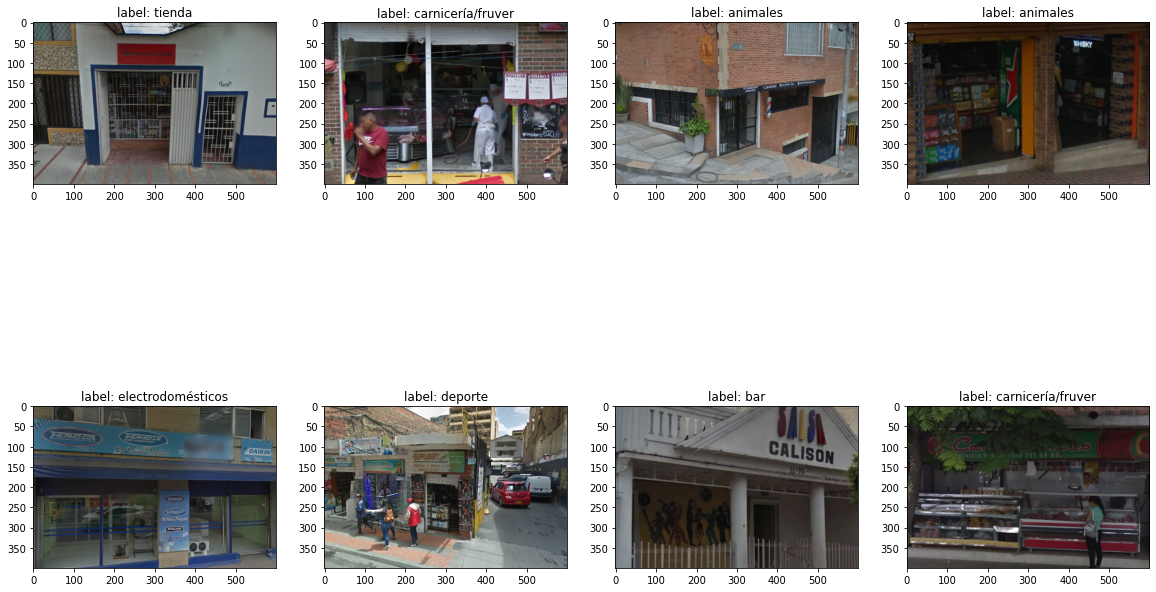

In [12]:
features_s, pred_labels_s = next(iter(train_dataloader_s))
print(f"Number of images and shape {features_s.shape} with its labels {len(labels)}")

plt.figure(figsize=(20, 20))
columns = 4
rows = int(len(features_s) / columns + 1)
for i, image in enumerate(features_s):
    image = transforms.ToPILImage()(image).convert("RGB")
    plt.subplot(rows, columns, i + 1)
    plt.imshow(image)
    plt.title(f"label: {labels[pred_labels_s[i]]}")